<img src="TechLabs.png">

<h2>Please enter your full name here: Micael Cunha Alves</h2> 


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [ ]:
import numpy as np

from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [ ]:
#Data train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

#Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
s_x_train = scaler.transform(x_train)
s_x_test = scaler.transform(x_test)

#Model fitting
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='liblinear')

logisticRegr.fit(s_x_train, y_train)

#Metrics of the current model
from sklearn import metrics
predictions = logisticRegr.predict(s_x_test)
#score = logisticRegr.score(s_x_test, y_test) alternative way to get the accuracy

accuracy=metrics.accuracy_score(y_test,predictions)
print("Accuracy: ",accuracy)

cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion matrix :", "\n",cm)

Accuracy:  0.9766081871345029
Confusion matrix : 
 [[ 60   3]
 [  1 107]]


In [ ]:
print(data.DESCR)

# Print the logit accuracy below:

In [ ]:
logitacc = "0.9766081871345029"
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.9766081871345029


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [ ]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

In [135]:
#Data train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

#Data Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
s_x_train = scaler.transform(x_train)
s_x_test = scaler.transform(x_test)

#Model Creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])
#sigmoid activation functions chosen for the three first layers as they demonstrated a better convergence in this situation than with relu activation functions
#binary classification, thus, sigmoid function chosen for the final layer activation function

In [136]:
#Model Training
history=model.fit(s_x_train, y_train, epochs=20, batch_size=10, validation_data=(s_x_test,y_test))

Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6770 - accuracy: 0.5530 - val_loss: 0.6347 - val_accuracy: 0.6316
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6070 - val_loss: 0.5527 - val_accuracy: 0.6316
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7148 - val_loss: 0.4156 - val_accuracy: 0.9357
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3697 - accuracy: 0.9320 - val_loss: 0.2758 - val_accuracy: 0.9240
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9542 - val_loss: 0.1947 - val_accuracy: 0.9415
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9654 - val_loss: 0.1513 - val_accuracy: 0.9415
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9765 - val_loss: 0.1226 - val_accuracy: 0.9766
Epoch 8/20
40/40 [==

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.evaluate(s_x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9825


[0.07271335273981094, 0.9824561476707458]

In [138]:
from sklearn.metrics import classification_report,confusion_matrix
ann_predictions=np.round(model.predict(s_x_test),decimals=0)
ann_accuracy=metrics.accuracy_score(y_test,ann_predictions)
print("Accuracy: ",ann_accuracy)
print("ANN Confusion Matrix:","\n",confusion_matrix(y_test,ann_predictions))

Accuracy:  0.9824561403508771
ANN Confusion Matrix: 
 [[ 61   2]
 [  1 107]]


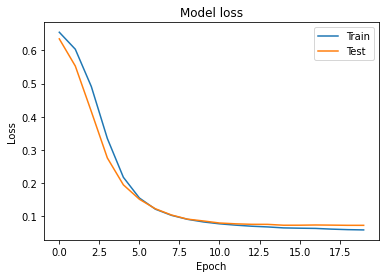

In [139]:
#Loss evolution of the training and test set
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

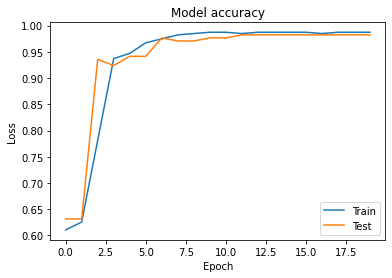

In [140]:
#Accuracy evolution of the training and test set
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
'''
this looks like a nice cell to train models
'''

'\nthis looks like a nice cell to train models\n'

In [142]:
ANNacc = "0.9824561403508771"
print(f"\ntesting set accuracy with neural network is: {ANNacc}")


testing set accuracy with neural network is: 0.9824561403508771


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [ ]:
'''Tell us here how you would explain the differences in performance among the models: The performance difference between the two models is really small, only 0.59% (98.25% - 97.66% (NN - logistic regression)). The slighty superior performance of neural network model can be explained to the fact that a neural network can learn non-linear relation among variables, while the linear model only learns linear relations. However, the high performance of the linear model suggests that the relation between the presence of breast cancer and the other variables is mostly linear. The available data is quite small with only 569 units, from which only 398 were used for the training of the model. With a higher amount of data, the performance of the neural network could certainly be improved. Despite the slightly lower performance of the logistic regression, I would choose the logistic regression model due to the higher interpretability for a similar performance. However, if the neural network was to improve drastically with an increased amount of data, we should consider switch to the neural network but only at the condition that its performance is significantly better from the logistic regression model.'''

'Tell us here how you would explain the differences in performance among the models: The performance difference between the two models is really small, only 0.59% (98.25% - 97.66% (NN - logistic regression)). The slighty superior performance of neural network model can be explained to the fact that a neural network can learn non-linear relation among variables, while the linear model only learns linear relations. However, the high performance of the linear model suggests that the relation between the presence of breast cancer and the other variables is mostly linear. The available data is quite small with only 569 units, from which only 398 were used for the training of the model. With a higher amount of data, the performance of the neural network could certainly be improved. Despite the slightly lower performance of the logistic regression, I would choose the logistic regression model due to the higher interpretability for a similar performance. However, if the neural network was to i

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [141]:
'''
This is your boss' favourite cell for option pricing
'''

#First method: Return payout and benefit

#Simulating 1 million yearly payouts by simulating 1 million yearly returns (preferred method).

#VARIABLES
#current_price: price at which the action is at the moment
#mu: drift (expected return)
#N:number of simulated final prices
#volatility: past volatility of the price of the action
#strikeprice: price at which the strike is

def return_simulator(current_price=69, mu=0.1,volatility=0.2, strikeprice=96,N=1000000):
  import numpy as np
  from scipy.stats import t

  returns = t.rvs(3, loc=mu, scale=volatility, size=N)+1 #simulating 1 million yearly returns
  finalprice=current_price*returns
  expectedpayout2=(np.sum(finalprice[finalprice>strikeprice]-strikeprice)/N)
  expectedbenefits2=expectedpayout2-1
  print("First method: ","\n","Expected payout: ",expectedpayout2,"\n","Expected benefit: ",expectedbenefits2)

return_simulator()

First method:  
 Expected payout:  2.0103492780739307 
 Expected benefit:  1.0103492780739307


In [ ]:
#Second method: Return payout and benefit
#Simulating 1 million payouts by simulating the daily price evolution through the whole year
#Issue: this method takes a long time to run with 1 million simulations.
#My recommendation is to try it with a lower N (number of simulated final prices)


#VARIABLES
#current_price: price at which the action is at the moment
#mu: drift (expected return)
#N:number of simulated final prices
#volatility: past volatility of the price of the action
#strikeprice: price at which the strike is

def return_simulator_2(current_price=69, mu=0.1,volatility=0.2, strikeprice=96,N=1000000):

  import numpy as np
  from scipy.stats import t
  days = 251   # Stock markets are open 251 days per year
  dt = 1/float(days)

  def random_walk(startprice):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = current_price
    for i in range(1, days):
        shock[i] = t.rvs(3, loc=mu * dt, scale=volatility * np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price[days-1]

  iterations=np.array([])
  for run in range(N):
      iterations = np.append(iterations, random_walk(current_price))
      if run%100000==0:
        print("Work in progress: ",run) 

  expectedpayout=(np.sum(iterations[iterations>strikeprice]-strikeprice)/N)
  expectedbenefits=expectedpayout-1
  print("\n","Second method: ","\n","Expected payout: ",expectedpayout,"\n","Expected benefit: ",expectedbenefits) 

In [104]:
return_simulator_2()

Work in progress:  0
Work in progress:  100000
Work in progress:  200000
Work in progress:  300000
Work in progress:  400000
Work in progress:  500000
Work in progress:  600000
Work in progress:  700000
Work in progress:  800000
Work in progress:  900000

 Second method:  
 Expected payout:  4.2719618081092054 
 Expected benefit:  3.2719618081092054


In [ ]:
#Results obtained with the second method and N = 1'000'000
#Second method:  
# Expected payout:  4.2719618081092054 
# Expected benefit:  3.2719618081092054

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
